In [1]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [9]:
df_NLP = pd.read_csv('/content/drive/MyDrive/stocks/stocks_submissions_NLP_clean.csv')

In [10]:
df_NLP.head(2)

,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized
0,2021-11-26 13:19:32,r2nb9a,SNAP seems like a great long-term buy at this ...,[removed],"['snap', 'seem', 'like', 'great', 'long-term',...",['remove']
1,2021-11-26 12:37:50,r2ma8u,$NVAX new variant,So the markets are tanking on new variant news...,"['nvax', 'new', 'variant']","['market', 'tank', 'new', 'variant', 'news', '..."


In [11]:
df_features = pd.read_csv('/content/drive/MyDrive/stocks/stocks_submissions_features_tickers.csv',sep=';')

In [12]:
df_features.head(2)

,created_utc,author,created_utc.1,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers
0,2021-11-26 13:19:32,NovelAnteater,2021-11-26 13:19:32,r2nb9a,NaN,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0,0.800000,0.750000,0.000000,0.000000,0.800000,"['SNAP', 'seems', 'like', 'a', 'great', 'long'...","['[', 'removed', ']']",['SNAP']
1,2021-11-26 12:37:50,VonDerBerg,2021-11-26 12:37:50,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"['$', 'NVAX', 'new', 'variant']","['So', 'the', 'markets', 'are', 'tanking', 'on...","['WE', 'NOW', 'NVAX', 'YOU', 'AN', 'FOR', 'UK'..."


In [13]:
#get link_flair_text,	num_comments,	score,upvote_ratio
df_features = pd.merge(df_features,df_NLP[['id','title_lemmatized',	'selftext_lemmatized',]],on='id',how='left')

In [14]:
df_features.head()

,created_utc,author,created_utc.1,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers,title_lemmatized,selftext_lemmatized
0,2021-11-26 13:19:32,NovelAnteater,2021-11-26 13:19:32,r2nb9a,NaN,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0,0.800000,0.750000,0.000000,0.000000,0.800000,"['SNAP', 'seems', 'like', 'a', 'great', 'long'...","['[', 'removed', ']']",['SNAP'],"['snap', 'seem', 'like', 'great', 'long-term',...",['remove']
1,2021-11-26 12:37:50,VonDerBerg,2021-11-26 12:37:50,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"['$', 'NVAX', 'new', 'variant']","['So', 'the', 'markets', 'are', 'tanking', 'on...","['WE', 'NOW', 'NVAX', 'YOU', 'AN', 'FOR', 'UK'...","['nvax', 'new', 'variant']","['market', 'tank', 'new', 'variant', 'news', '..."
2,2021-11-26 12:36:24,VonDerBerg,2021-11-26 12:36:24,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0,0.136364,0.454545,0.000000,0.000000,0.136364,"['$', 'NVAX', 'new', 'variant']","['[', 'removed', ']']",['NVAX'],"['nvax', 'new', 'variant']",['remove']
3,2021-11-26 12:29:36,VonDerBerg,2021-11-26 12:29:36,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0,0.400000,1.000000,0.000000,0.000000,0.400000,"['$', 'NVAX', 'lift', '-', 'off', 'confirmed']","['[', 'removed', ']']",['NVAX'],"['nvax', 'lift-off', 'confirm']",['remove']
4,2021-11-26 12:10:01,ghdsvor,2021-11-26 12:10:01,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"['Where', 'to', 'find', 'dates', 'that', 'annu...","['[', 'removed', ']']",NaN,"['find', 'date', 'annual', 'report', 'publish']",['remove']


## 2.1 Sentiment Analysis

In [15]:
df_features.drop('created_utc.1',inplace=True,axis=1)

In [16]:
df_features.head()

,created_utc,author,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers,title_lemmatized,selftext_lemmatized
0,2021-11-26 13:19:32,NovelAnteater,r2nb9a,NaN,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0,0.800000,0.750000,0.000000,0.000000,0.800000,"['SNAP', 'seems', 'like', 'a', 'great', 'long'...","['[', 'removed', ']']",['SNAP'],"['snap', 'seem', 'like', 'great', 'long-term',...",['remove']
1,2021-11-26 12:37:50,VonDerBerg,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"['$', 'NVAX', 'new', 'variant']","['So', 'the', 'markets', 'are', 'tanking', 'on...","['WE', 'NOW', 'NVAX', 'YOU', 'AN', 'FOR', 'UK'...","['nvax', 'new', 'variant']","['market', 'tank', 'new', 'variant', 'news', '..."
2,2021-11-26 12:36:24,VonDerBerg,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0,0.136364,0.454545,0.000000,0.000000,0.136364,"['$', 'NVAX', 'new', 'variant']","['[', 'removed', ']']",['NVAX'],"['nvax', 'new', 'variant']",['remove']
3,2021-11-26 12:29:36,VonDerBerg,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0,0.400000,1.000000,0.000000,0.000000,0.400000,"['$', 'NVAX', 'lift', '-', 'off', 'confirmed']","['[', 'removed', ']']",['NVAX'],"['nvax', 'lift-off', 'confirm']",['remove']
4,2021-11-26 12:10:01,ghdsvor,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"['Where', 'to', 'find', 'dates', 'that', 'annu...","['[', 'removed', ']']",NaN,"['find', 'date', 'annual', 'report', 'publish']",['remove']


In [17]:
df_NLP = df_features

In [ ]:
#@todo: comparison between score and sentiment, upvotes and sentiment 

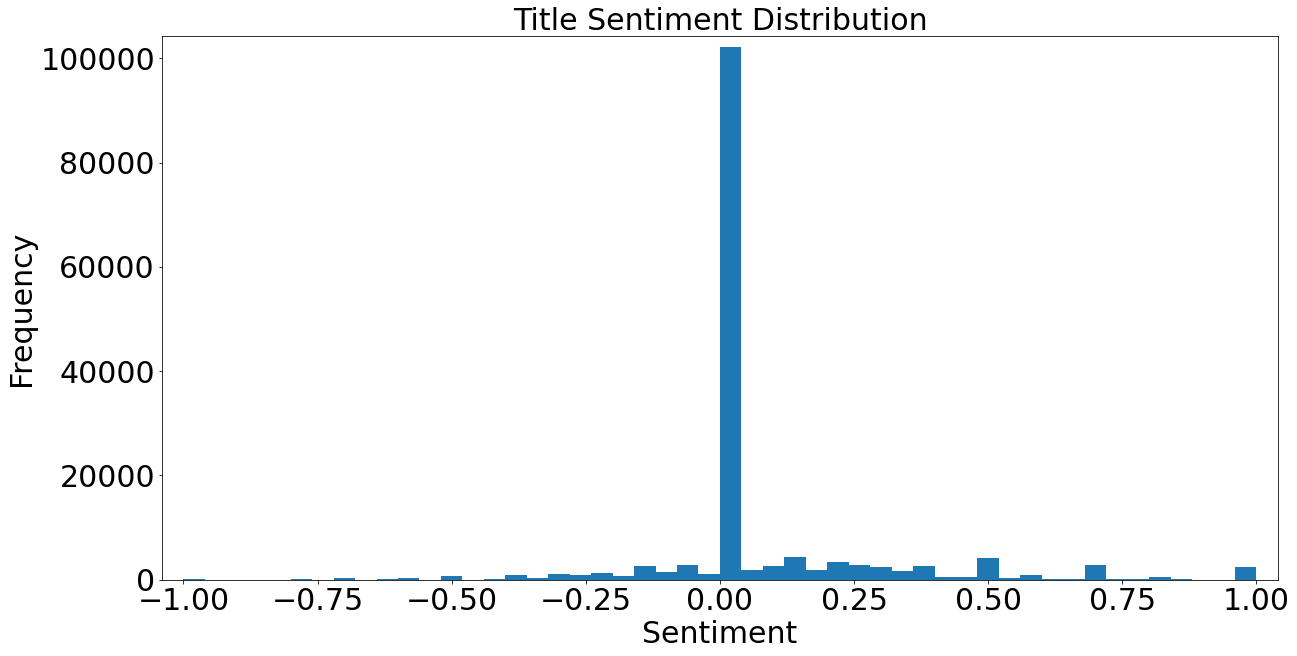

In [74]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['title_polarity'], bins=50)
plt.title('Title Sentiment Distribution', fontsize=30)
plt.show()

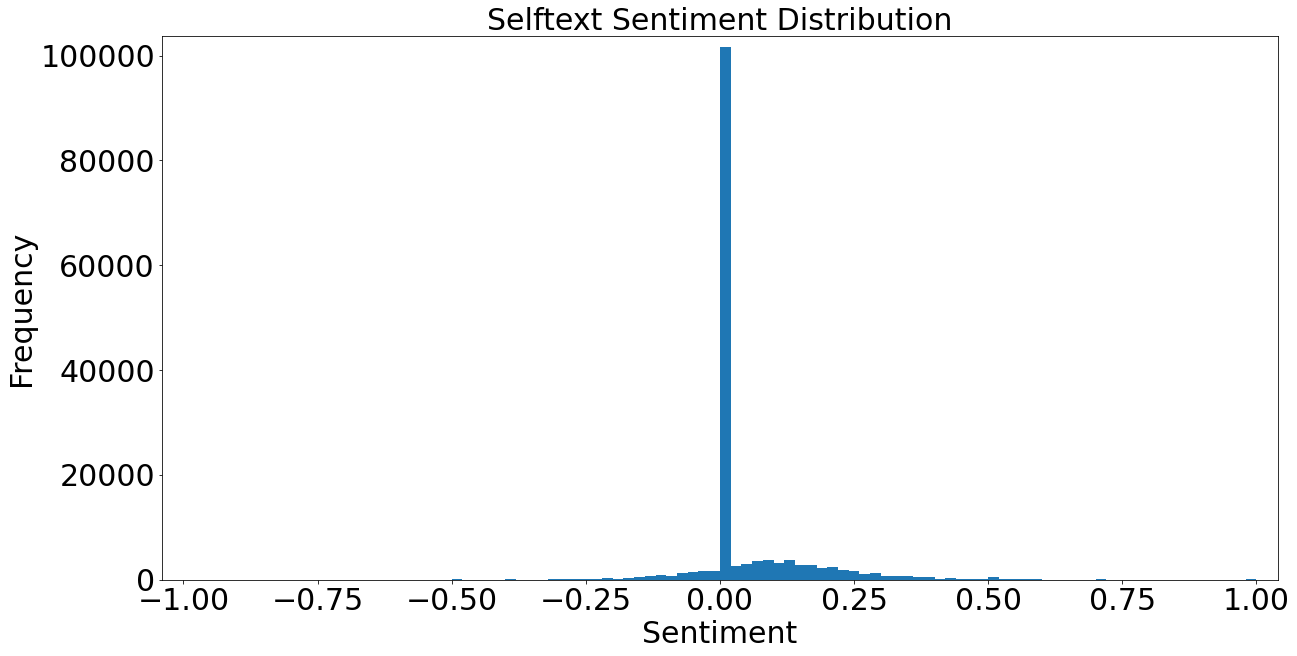

In [75]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['body_polarity'], bins=100)
plt.title('Selftext Sentiment Distribution', fontsize=30)
plt.show()

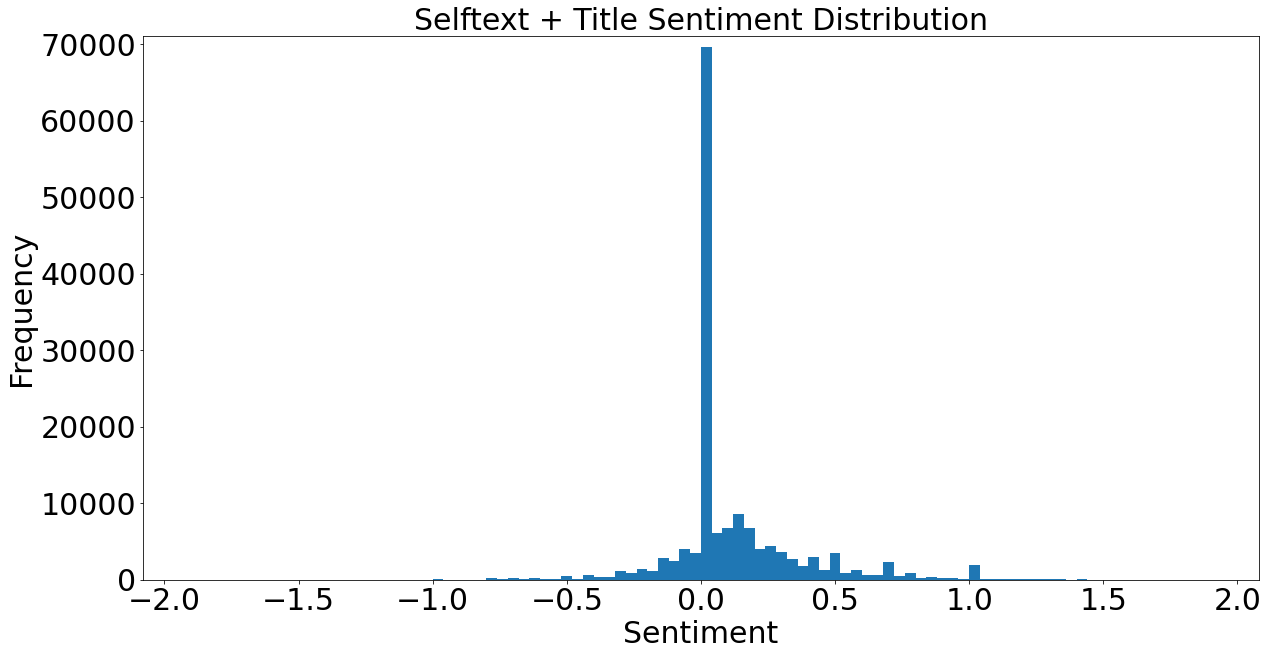

In [76]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['polarity'], bins=100)
plt.title('Selftext + Title Sentiment Distribution', fontsize=30)
plt.show()

In [ ]:
#average sentiment by category
#pre vs post hype sentiment comparision

## 2.2 Word count

In [80]:
df_NLP['word_count_title'] = df_NLP['title_lemmatized'].apply(lambda x: len(str(x).split()))
df_NLP['word_count_selfttext'] = df_NLP['selftext_lemmatized'].apply(lambda x: len(str(x).split()))

In [81]:
df_NLP.head()

,created_utc,author,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers,title_lemmatized,selftext_lemmatized,word_count_title,word_count_selfttext
0,2021-11-26 13:19:32,NovelAnteater,r2nb9a,NaN,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0,0.800000,0.750000,0.000000,0.000000,0.800000,"['SNAP', 'seems', 'like', 'a', 'great', 'long'...","['[', 'removed', ']']",['SNAP'],"['snap', 'seem', 'like', 'great', 'long-term',...",['remove'],7,1
1,2021-11-26 12:37:50,VonDerBerg,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"['$', 'NVAX', 'new', 'variant']","['So', 'the', 'markets', 'are', 'tanking', 'on...","['WE', 'NOW', 'NVAX', 'YOU', 'AN', 'FOR', 'UK'...","['nvax', 'new', 'variant']","['market', 'tank', 'new', 'variant', 'news', '...",3,136
2,2021-11-26 12:36:24,VonDerBerg,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0,0.136364,0.454545,0.000000,0.000000,0.136364,"['$', 'NVAX', 'new', 'variant']","['[', 'removed', ']']",['NVAX'],"['nvax', 'new', 'variant']",['remove'],3,1
3,2021-11-26 12:29:36,VonDerBerg,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0,0.400000,1.000000,0.000000,0.000000,0.400000,"['$', 'NVAX', 'lift', '-', 'off', 'confirmed']","['[', 'removed', ']']",['NVAX'],"['nvax', 'lift-off', 'confirm']",['remove'],3,1
4,2021-11-26 12:10:01,ghdsvor,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"['Where', 'to', 'find', 'dates', 'that', 'annu...","['[', 'removed', ']']",NaN,"['find', 'date', 'annual', 'report', 'publish']",['remove'],5,1


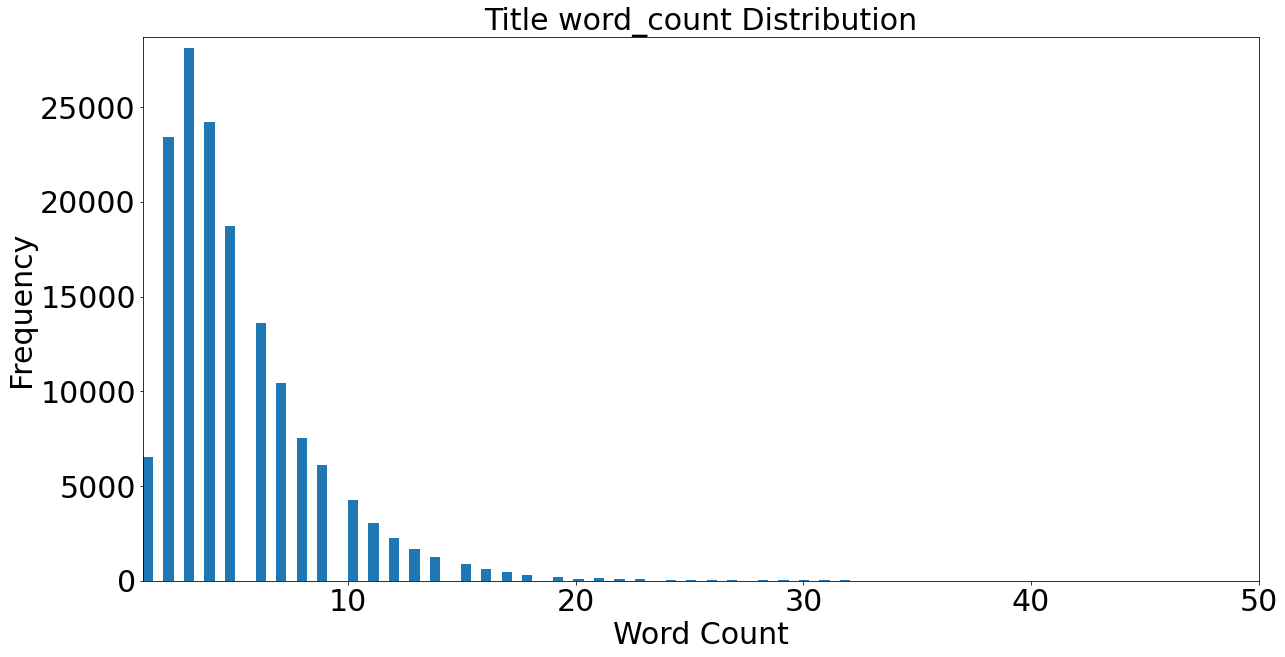

In [87]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Word Count', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['word_count_title'], bins=100)
plt.xlim(xmin=1, xmax = 50)
plt.title('Title word_count Distribution', fontsize=30)
plt.show()

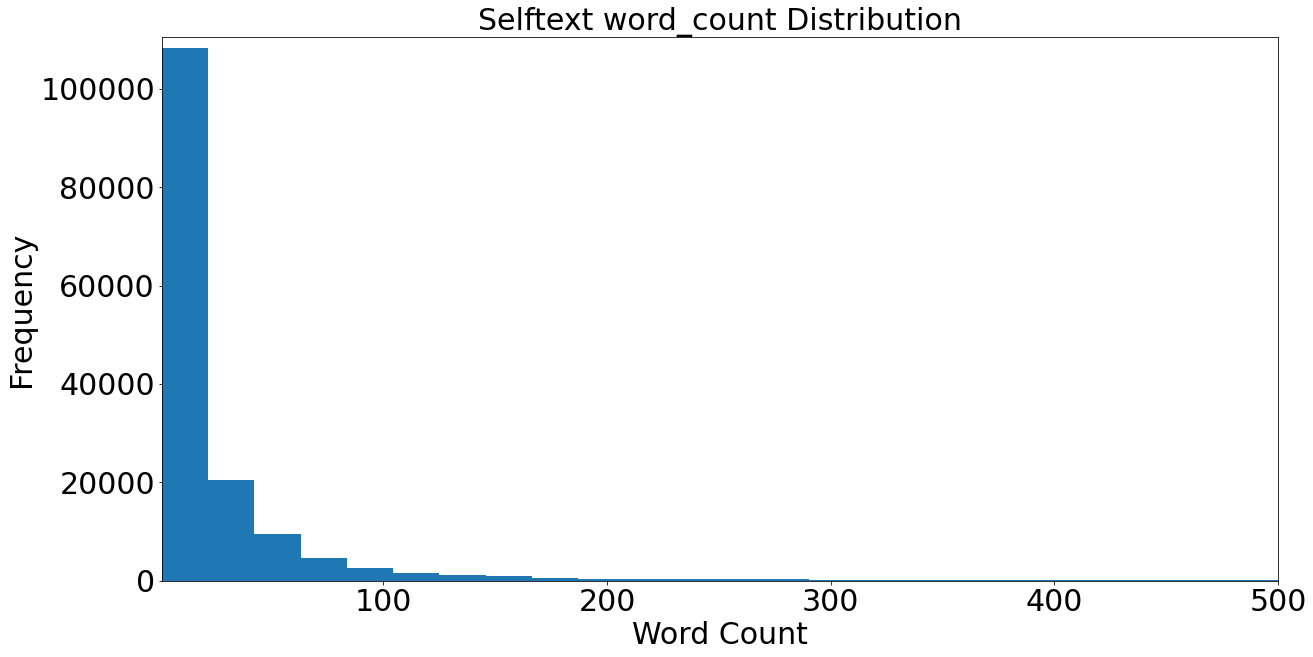

In [90]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Word Count', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['word_count_selfttext'], bins=200)
plt.xlim(xmin=1, xmax = 500)
plt.title('Selftext word_count Distribution', fontsize=30)
plt.show()

##sentiment by categories

In [92]:
#sentiment by categories 
df_by_category = df_NLP.groupby("link_flair_text")["title_polarity"].mean()

In [ ]:
df_by_category

link_flair_text
Announcement                       0.000000
Chart                              0.025772
DD                                 0.032400
Daily Discussion                   0.000000
Discussion                         0.021313
Donation                           0.029176
Earnings Thread                   -0.003333
Forex                              0.084512
Fundamentals                       0.016581
Futures                            0.010291
GME Thread                        -0.200000
Gain                               0.050120
Gods                               0.107143
IT'S ACTUALLY GOOD                 0.000000
Literally 10 minutes long          0.000000
Loss                               0.008005
Megathread                         0.000000
Meme                               0.031674
Mods                               0.015289
Mods - Regarding MrBeast Post      0.000000
Mods - Rule Reminder               0.000000
News                               0.023628
Official        

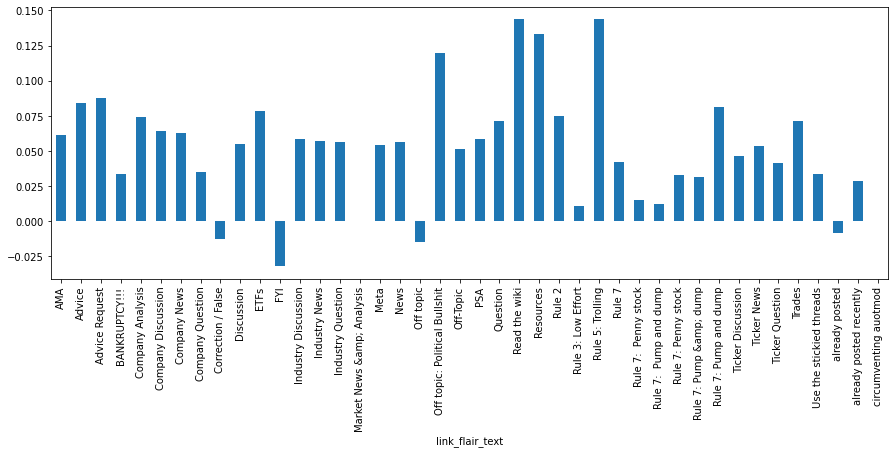

In [93]:
df_by_category.plot.bar(figsize=(15, 5))

In [94]:
df_by_category = df_NLP.groupby("link_flair_text")["body_polarity"].mean()
df_by_category

link_flair_text
AMA                              0.045719
Advice                           0.051118
Advice Request                   0.052985
BANKRUPTCY!!!                    0.037815
Company Analysis                 0.041619
Company Discussion               0.044679
Company News                     0.040840
Company Question                 0.032634
Correction / False               0.015692
Discussion                       0.061009
ETFs                             0.058809
FYI                              0.021032
Industry Discussion              0.049488
Industry News                    0.026319
Industry Question                0.040168
Market News &amp; Analysis       0.080658
Meta                             0.037444
News                             0.045068
Off topic                        0.000000
Off topic: Political Bullshit    0.000000
Off-Topic                        0.038933
PSA                              0.027168
Question                         0.058413
Read the wiki     

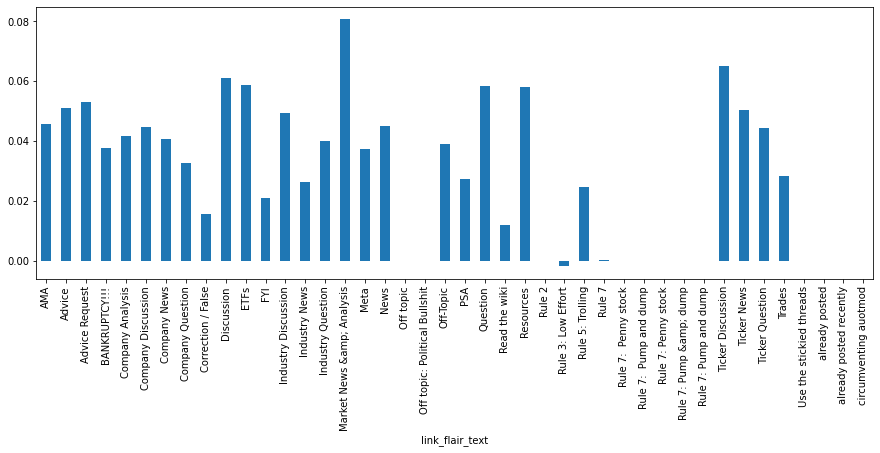

In [95]:
df_by_category.plot.bar(figsize=(15, 5))

In [96]:
df_by_category = df_NLP.groupby("link_flair_text")["polarity"].mean()
df_by_category

link_flair_text
AMA                              0.106765
Advice                           0.135489
Advice Request                   0.140759
BANKRUPTCY!!!                    0.071508
Company Analysis                 0.115509
Company Discussion               0.108530
Company News                     0.103666
Company Question                 0.067380
Correction / False               0.003278
Discussion                       0.115608
ETFs                             0.137229
FYI                             -0.011142
Industry Discussion              0.107929
Industry News                    0.083676
Industry Question                0.096614
Market News &amp; Analysis       0.080658
Meta                             0.091579
News                             0.101675
Off topic                       -0.014946
Off topic: Political Bullshit    0.120000
Off-Topic                        0.090342
PSA                              0.085501
Question                         0.129982
Read the wiki     

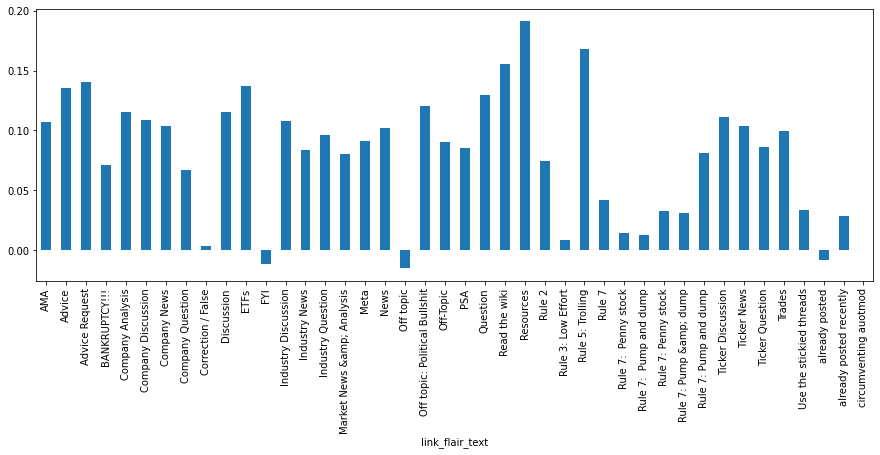

In [97]:
df_by_category.plot.bar(figsize=(15, 5))

## Word Count by category

In [98]:
df_by_category = df_NLP.groupby("link_flair_text")["word_count_title"].mean()
df_by_category

link_flair_text
AMA                              5.568627
Advice                           4.824153
Advice Request                   4.789991
BANKRUPTCY!!!                    4.800000
Company Analysis                 6.356923
Company Discussion               5.488378
Company News                     7.818920
Company Question                 4.993564
Correction / False               6.023256
Discussion                       5.330953
ETFs                             5.434180
FYI                              8.375000
Industry Discussion              5.954248
Industry News                    7.545833
Industry Question                5.529368
Market News &amp; Analysis       6.000000
Meta                             6.633603
News                             8.530218
Off topic                        6.136364
Off topic: Political Bullshit    7.800000
Off-Topic                        5.427718
PSA                              6.000000
Question                         5.068835
Read the wiki     

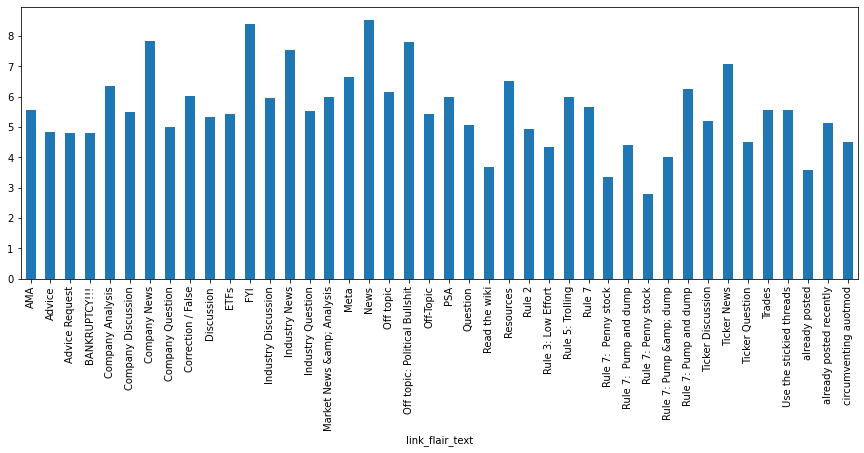

In [99]:
df_by_category.plot.bar(figsize=(15, 5))

In [100]:
df_by_category = df_NLP.groupby("link_flair_text")["word_count_selfttext"].mean()
df_by_category

link_flair_text
AMA                               36.764706
Advice                            28.043510
Advice Request                    23.328919
BANKRUPTCY!!!                     32.400000
Company Analysis                 145.199487
Company Discussion                63.740048
Company News                      49.857897
Company Question                  18.104586
Correction / False                38.627907
Discussion                        38.726431
ETFs                              35.795612
FYI                               11.250000
Industry Discussion               69.938562
Industry News                     48.352778
Industry Question                 21.795539
Market News &amp; Analysis       682.000000
Meta                              58.668016
News                             168.826816
Off topic                          1.000000
Off topic: Political Bullshit      1.000000
Off-Topic                         25.291517
PSA                               29.250000
Question        

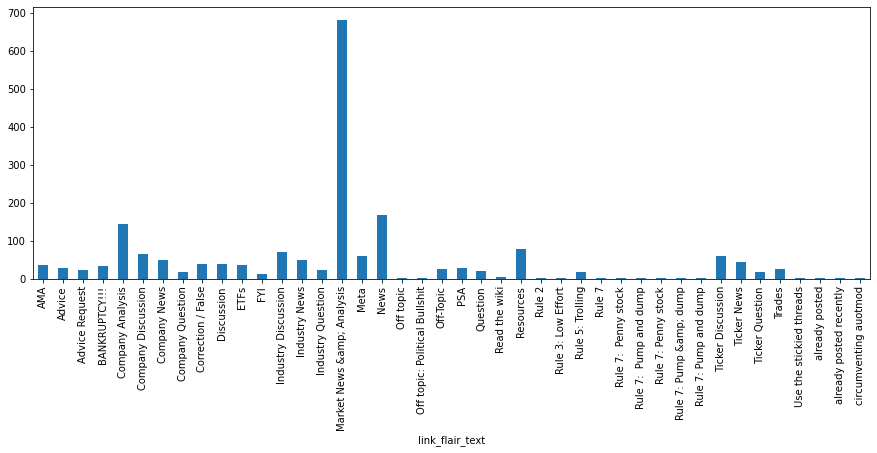

In [101]:
df_by_category.plot.bar(figsize=(15, 5))

## correlation between category,sentiment,word_count etc

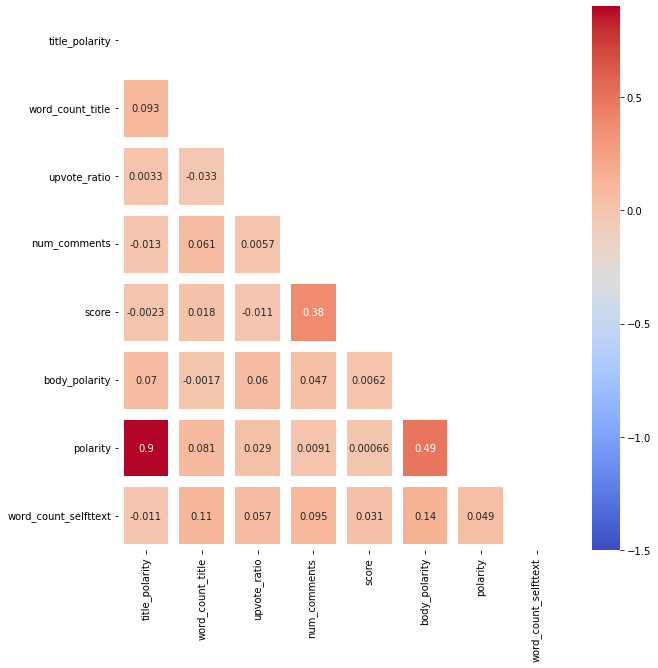

In [104]:

correlation = df_NLP[['title_polarity','word_count_title','upvote_ratio','num_comments','score','body_polarity','polarity','word_count_selfttext']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 10}, linewidths=10, vmin=-1.5, mask=mask)

## 2.3 Term Frequency Analysis

In [123]:
df_NLP = df_NLP.dropna(subset=['title_lemmatized'])

In [125]:
import ast
words =  df_NLP['title_lemmatized'].apply(lambda s: list(ast.literal_eval(s)))#
print(words[0:5])
#
allwords = []
for word in words:
    allwords += word
print(allwords[0:50])


0    [snap, seem, like, great, long-term, buy, price]
1                                [nvax, new, variant]
2                                [nvax, new, variant]
3                           [nvax, lift-off, confirm]
4               [find, date, annual, report, publish]
Name: title_lemmatized, dtype: object
['snap', 'seem', 'like', 'great', 'long-term', 'buy', 'price', 'nvax', 'new', 'variant', 'nvax', 'new', 'variant', 'nvax', 'lift-off', 'confirm', 'find', 'date', 'annual', 'report', 'publish', 'greedy', 'others', 'fearful', 'fearful', 'others', 'greedy', 'nasdaq', 'tech', 'company', 'inflation', 'r/stocks', 'daily', 'thread', 'meme', 'stock', 'friday', 'nov', '26', '2021', 'individual', 'short', 'stock', 'impact', 'intel', 'return', 'gpu', 'market', 'nvidia', 'underestimate']


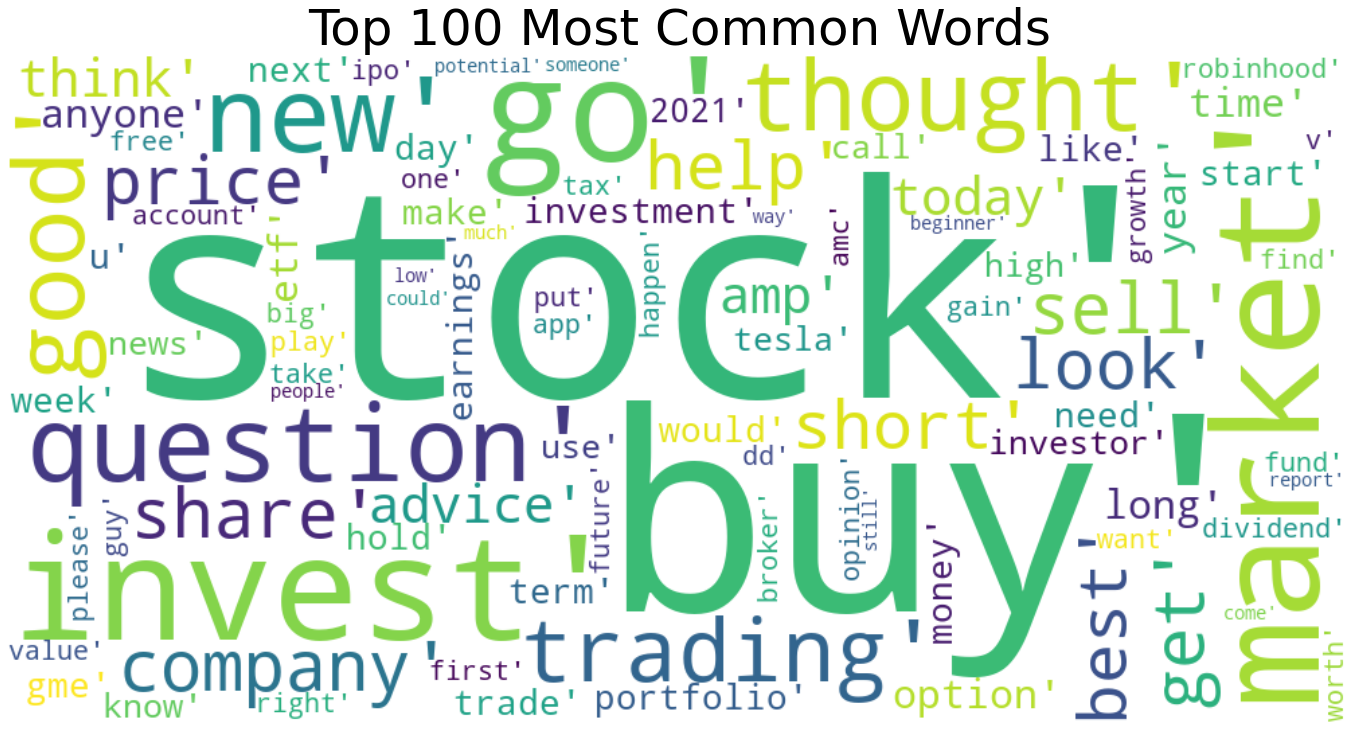

In [126]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

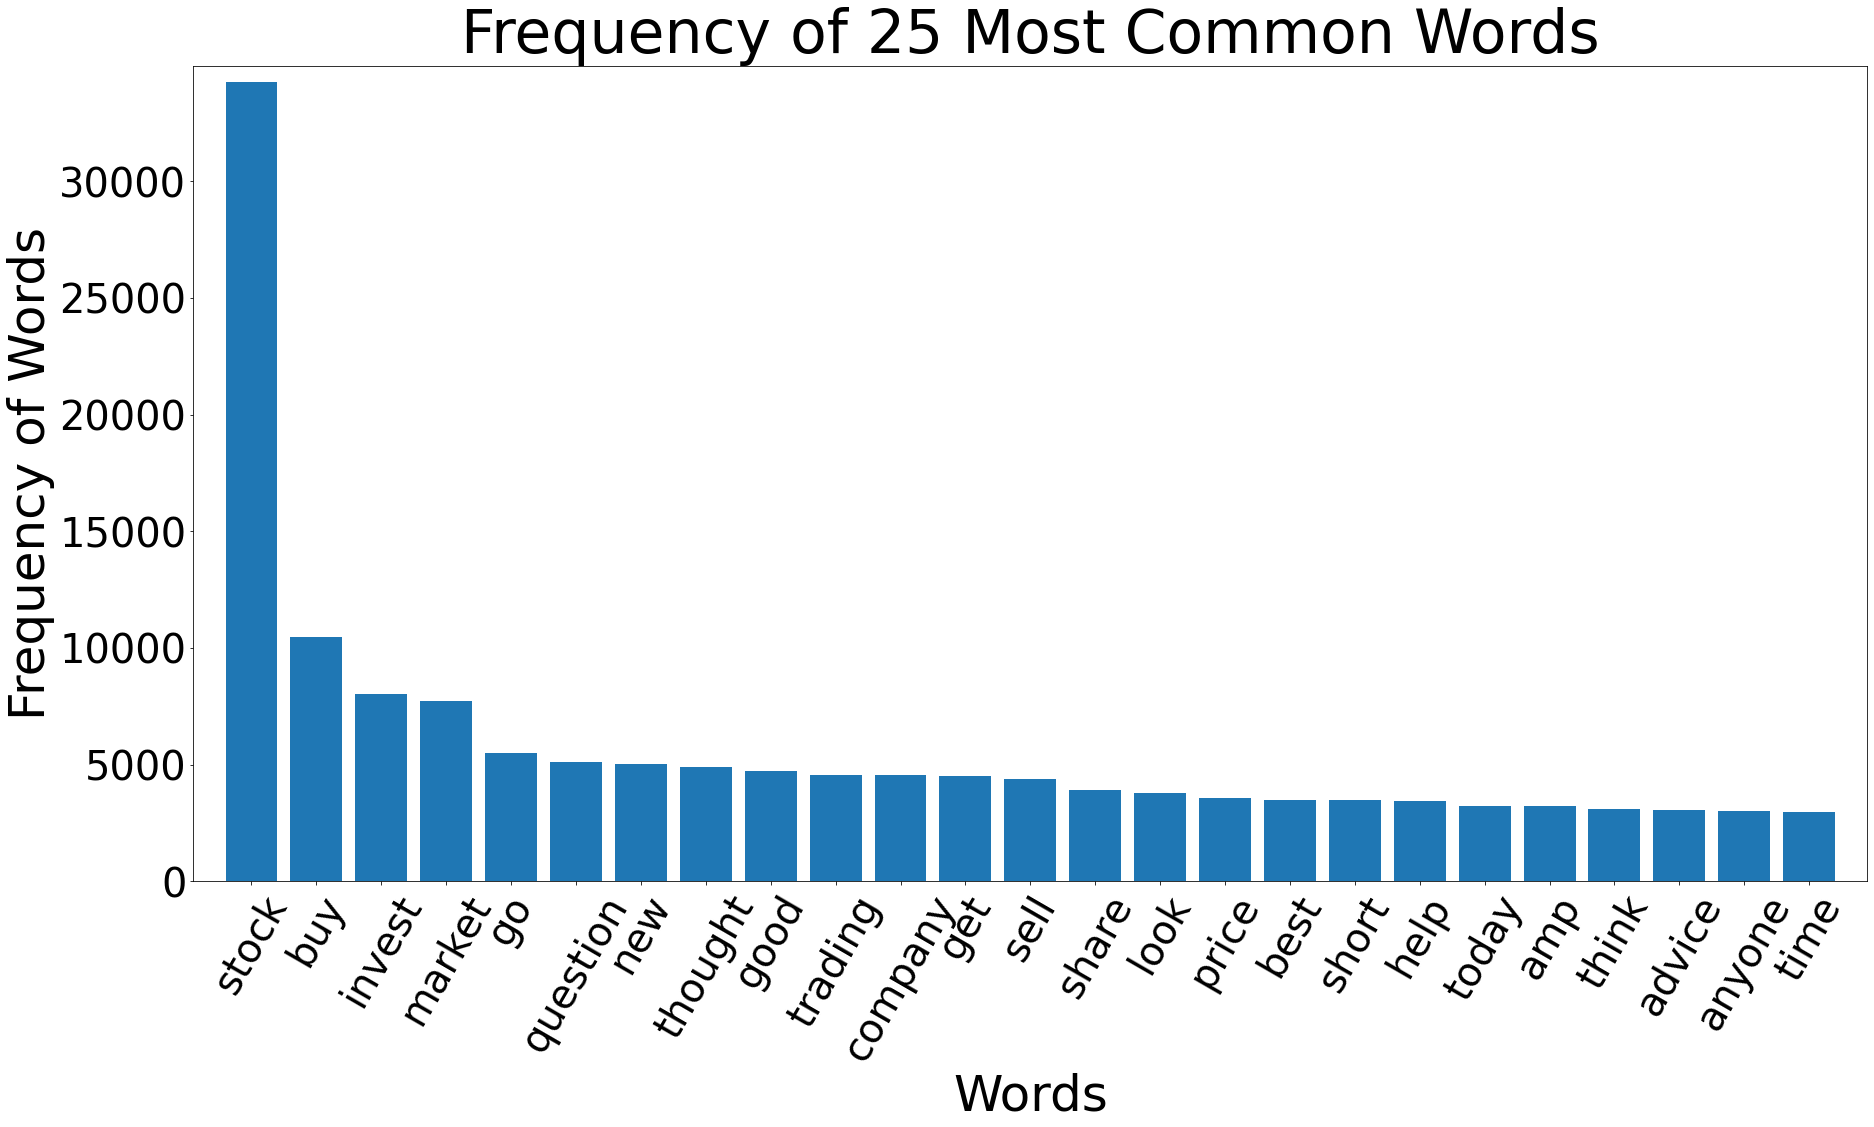

In [127]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(30,15))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [128]:
words =  df_NLP['selftext_lemmatized'].apply(lambda s: list(ast.literal_eval(s)))
allwords_selftext = []
for wordlist in words:
    allwords_selftext += wordlist
print(allwords_selftext[0:50])

['remove', 'market', 'tank', 'new', 'variant', 'news', 'nvax', 'might', 'save', 'day', 'protein', 'base', 'long', 'lasting', 'efficient', 'vax', 'require', 'esoteric', 'storage', 'logistical', 'condition', 'next', 'well..', 'nvax', 'eu', 'ema', 'presentation', '11/25/21', 'ema', 'chief', 'say', 'final', 'assessment', 'novavax', 'roll', 'review', 'complete', '11/17/21', 'http', '//ibb.co/r5m9hr1', 'eu', 'approval', 'imminent', 'eu', 'ema', 'head', 'marco', 'calveri', 'present', 'ecdc/eu']


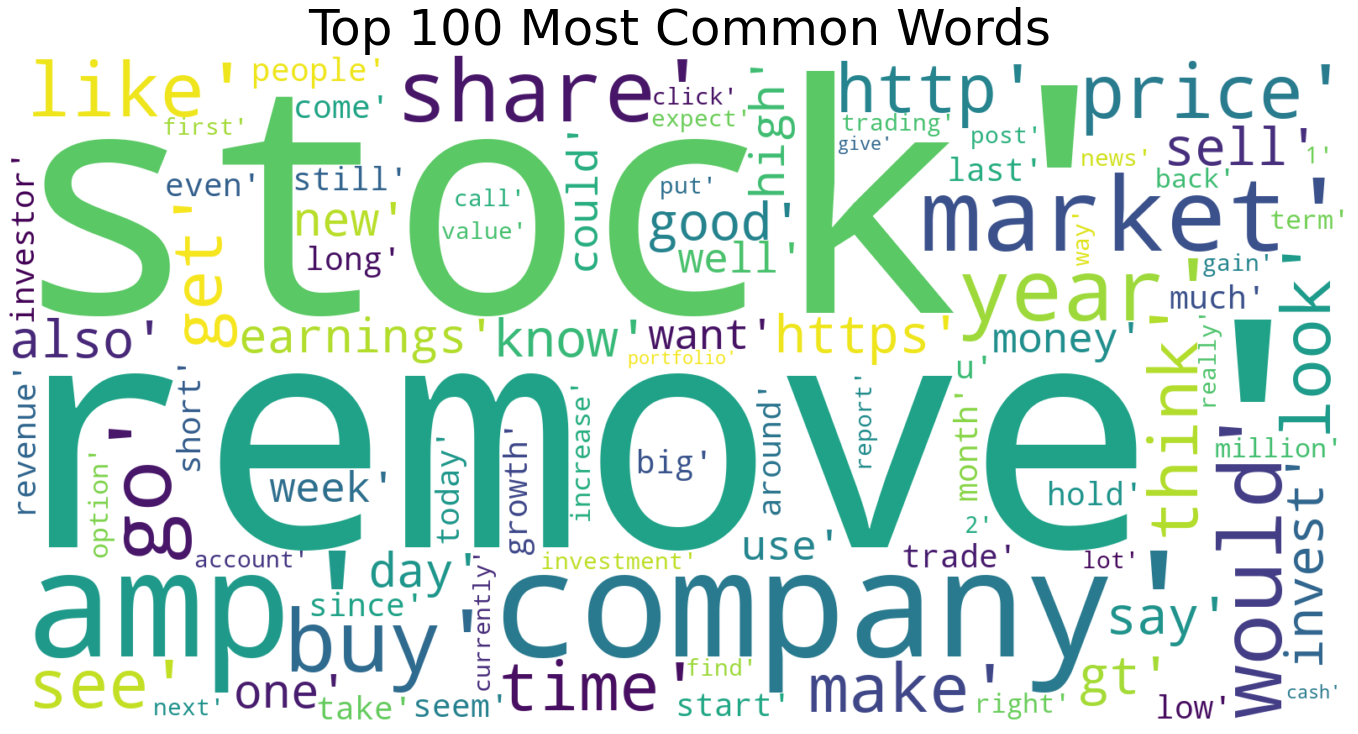

In [129]:
mostcommon = FreqDist(allwords_selftext).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

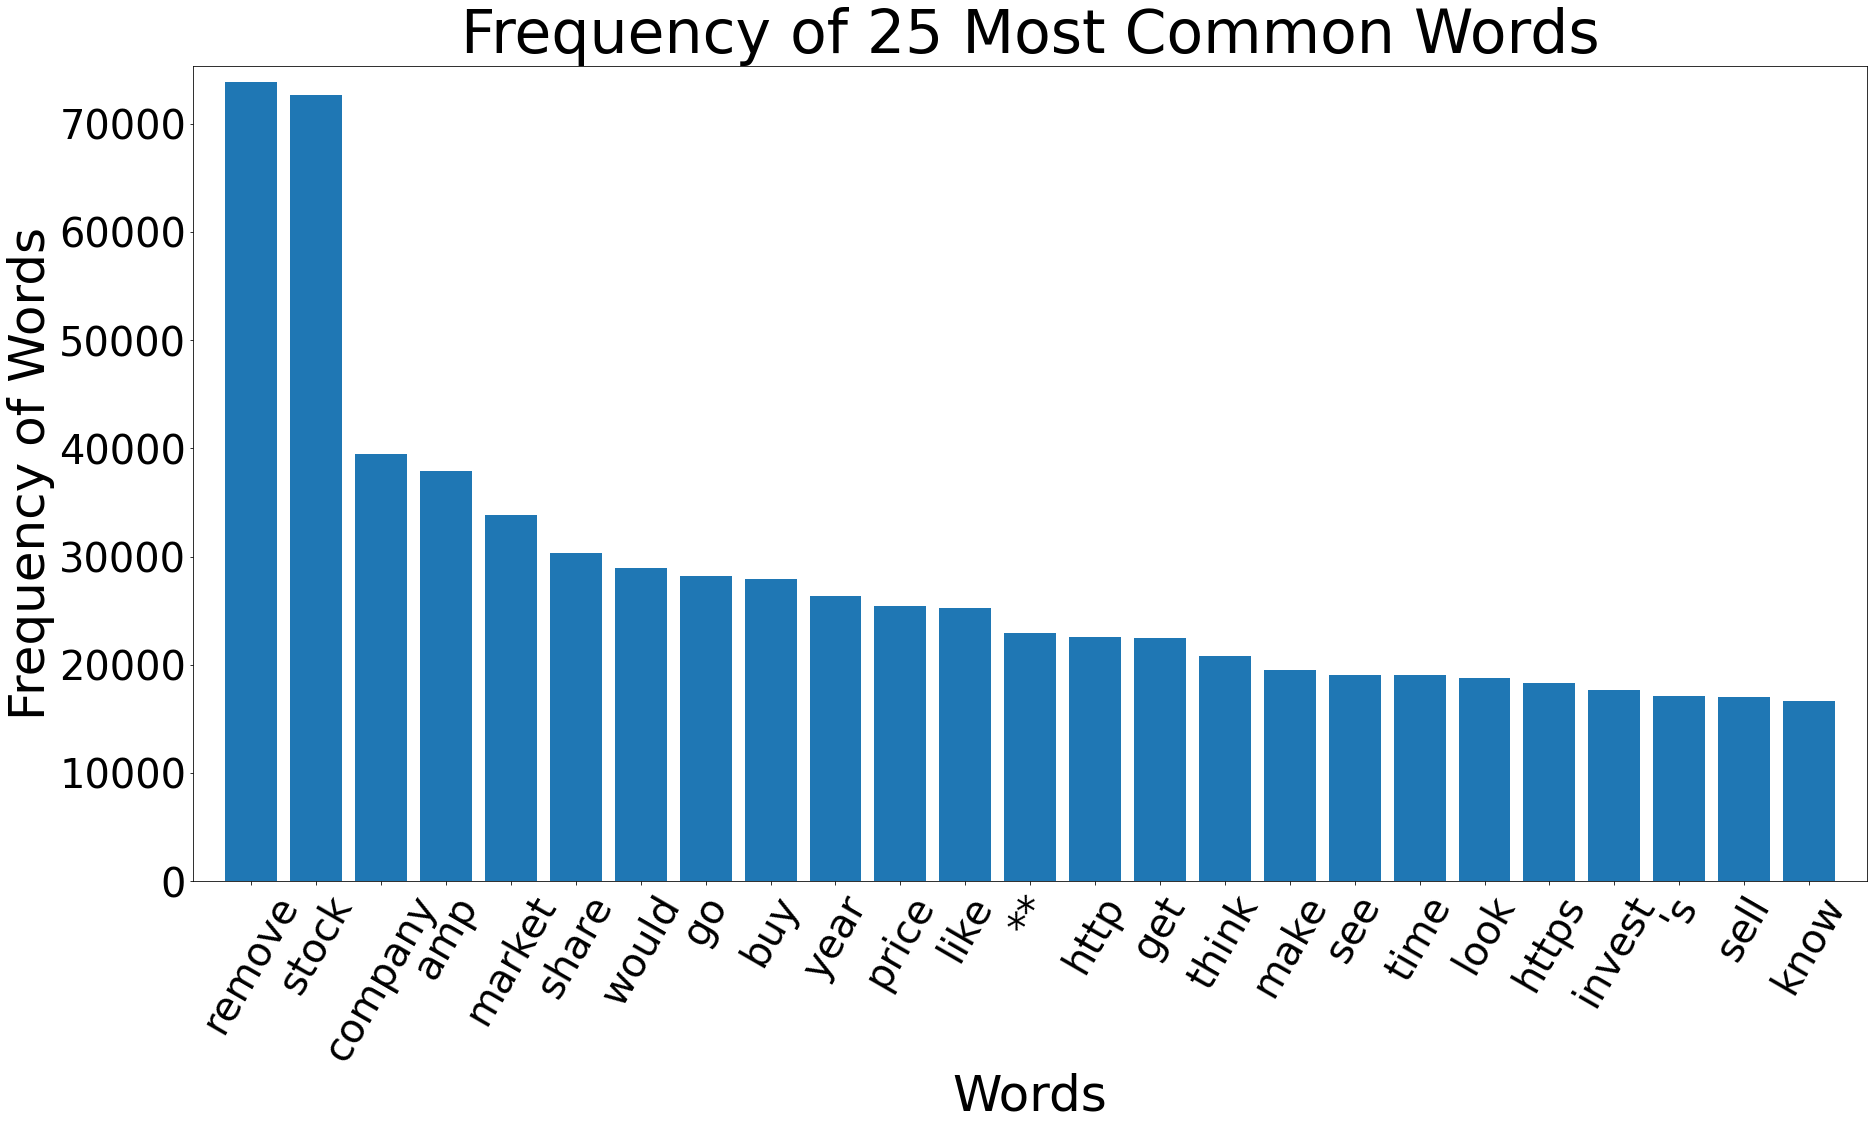

In [130]:
mostcommon_small = FreqDist(allwords_selftext).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(30,15))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [131]:
#df_NLP = df_NLP[['created_utc','id',	'title_lemmatized',	'selftext_lemmatized',	'title_sentiment',	'selftext_lsentiment',	'word_count_title',	'word_count_selfttext']]
df_NLP.head()

,created_utc,author,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers,title_lemmatized,selftext_lemmatized,word_count_title,word_count_selfttext
0,2021-11-26 13:19:32,NovelAnteater,r2nb9a,NaN,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0,0.800000,0.750000,0.000000,0.000000,0.800000,"['SNAP', 'seems', 'like', 'a', 'great', 'long'...","['[', 'removed', ']']",['SNAP'],"['snap', 'seem', 'like', 'great', 'long-term',...",['remove'],7,1
1,2021-11-26 12:37:50,VonDerBerg,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"['$', 'NVAX', 'new', 'variant']","['So', 'the', 'markets', 'are', 'tanking', 'on...","['WE', 'NOW', 'NVAX', 'YOU', 'AN', 'FOR', 'UK'...","['nvax', 'new', 'variant']","['market', 'tank', 'new', 'variant', 'news', '...",3,136
2,2021-11-26 12:36:24,VonDerBerg,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0,0.136364,0.454545,0.000000,0.000000,0.136364,"['$', 'NVAX', 'new', 'variant']","['[', 'removed', ']']",['NVAX'],"['nvax', 'new', 'variant']",['remove'],3,1
3,2021-11-26 12:29:36,VonDerBerg,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0,0.400000,1.000000,0.000000,0.000000,0.400000,"['$', 'NVAX', 'lift', '-', 'off', 'confirmed']","['[', 'removed', ']']",['NVAX'],"['nvax', 'lift-off', 'confirm']",['remove'],3,1
4,2021-11-26 12:10:01,ghdsvor,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"['Where', 'to', 'find', 'dates', 'that', 'annu...","['[', 'removed', ']']",NaN,"['find', 'date', 'annual', 'report', 'publish']",['remove'],5,1


In [132]:
df_NLP.index = pd.DatetimeIndex(df_NLP.created_utc)

In [133]:

#df_daily.index = pd.DatetimeIndex(df_NLP.created_utc)
df_daily_title_sentiment = df_NLP.groupby(pd.Grouper(freq="D"))[["title_polarity"]].mean()
df_daily_title_wordcount = df_NLP.groupby(pd.Grouper(freq="D"))[["word_count_title"]].mean()

df_daily_selftext_sentiment = df_NLP.groupby(pd.Grouper(freq="D"))[["body_polarity"]].mean()
df_daily_selftextwordcount = df_NLP.groupby(pd.Grouper(freq="D"))[["word_count_selfttext"]].mean()

df_daily_num_comments = df_NLP.groupby(pd.Grouper(freq="D"))[["num_comments"]].mean()
df_daily_score = df_NLP.groupby(pd.Grouper(freq="D"))[["score"]].mean()

df_daily_upvote_ratio = df_NLP.groupby(pd.Grouper(freq="D"))[["upvote_ratio"]].mean()

df_daily_polarity = df_NLP.groupby(pd.Grouper(freq="D"))[["polarity"]].mean()
#df_daily['upvote_ratio'] = df_NLP.groupby(pd.Grouper(freq="D"))[["link_flair_text"]].count()



In [134]:
type(df_daily_title_sentiment)

pandas.core.frame.DataFrame

In [135]:

df_daily = pd.concat([df_daily_title_sentiment,df_daily_title_wordcount,df_daily_selftext_sentiment,df_daily_selftextwordcount,df_daily_num_comments,df_daily_score,df_daily_upvote_ratio,df_daily_polarity], axis=1)

df_daily.head()

,title_polarity,word_count_title,body_polarity,word_count_selfttext,num_comments,score,upvote_ratio,polarity
created_utc,,,,,,,,
2018-12-30,0.178294,4.709677,-0.010424,4.322581,16.096774,1.0,0.0,0.167870
2018-12-31,0.089521,6.677419,0.040845,37.419355,10.451613,1.0,0.0,0.130366
2019-01-01,0.002500,5.700000,-0.003125,3.000000,9.200000,1.0,0.0,-0.000625
2019-01-02,0.142339,5.707317,-0.005820,24.585366,16.097561,1.0,0.0,0.136519
2019-01-03,0.126053,5.735294,0.020485,24.823529,14.764706,1.0,0.0,0.146538


In [136]:
df_daily.to_csv('/content/drive/MyDrive/stocks/stocks_submissions_daily.csv')

In [137]:
df_NLP.to_csv('/content/drive/MyDrive/stocks/stocks_submissions_features_tickers.csv')